In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:46<00:00, 25.7MB/s]
100% 1.06G/1.06G [00:46<00:00, 24.6MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras import Sequential

In [6]:
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

test_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [8]:
for images, labels in train_data.take(1):
    print("Batch of images:", images.shape)
    print("Batch of labels:", labels)

Batch of images: (32, 256, 256, 3)
Batch of labels: tf.Tensor([0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1], shape=(32,), dtype=int32)


In [9]:
# we need to normalize our image data
def normalize(image,label):
  image = tf.cast(image/255, tf.float32)
  return image, label

In [10]:
train_data = train_data.map(normalize)

In [11]:
test_data = test_data.map(normalize)

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_data,epochs=10, validation_data=test_data)

Epoch 1/10
625/625 [==============================] - 69s 98ms/step - loss: 0.6009 - accuracy: 0.6700 - val_loss: 0.5418 - val_accuracy: 0.7196
Epoch 2/10
625/625 [==============================] - 62s 99ms/step - loss: 0.4693 - accuracy: 0.7735 - val_loss: 0.4923 - val_accuracy: 0.7664
Epoch 3/10
625/625 [==============================] - 54s 85ms/step - loss: 0.3603 - accuracy: 0.8379 - val_loss: 0.4809 - val_accuracy: 0.8004
Epoch 4/10
625/625 [==============================] - 54s 86ms/step - loss: 0.2259 - accuracy: 0.9068 - val_loss: 0.6294 - val_accuracy: 0.8002
Epoch 5/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1207 - accuracy: 0.9525 - val_loss: 0.8532 - val_accuracy: 0.7906
Epoch 6/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0790 - accuracy: 0.9718 - val_loss: 1.0341 - val_accuracy: 0.7766
Epoch 7/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0631 - accuracy: 0.9785 - val_loss: 1.0482 - val_accuracy:

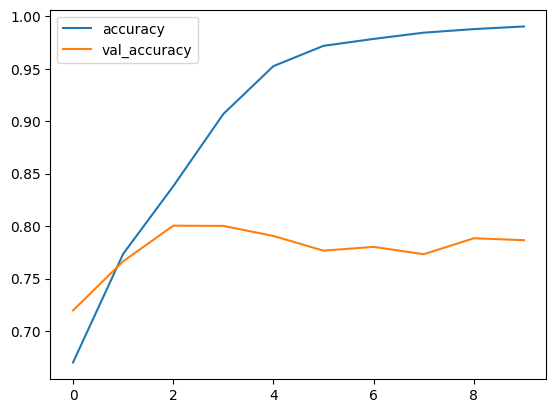

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

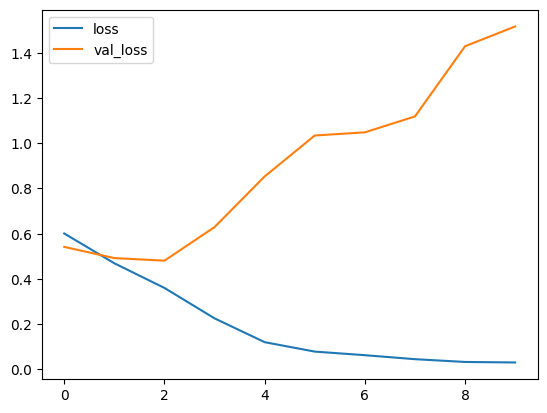

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# overfitting
# 1-->> Try to reduce overfitting using Dropout layer

In [ ]:
# model1 = Sequential()

# model1.add(Conv2D(32, kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))
# model1.add(Dropout(0.3))
# model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model1.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
# model1.add(Dropout(0.25))
# model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model1.add(Conv2D(128, kernel_size=(3,3),padding='valid', activation='relu'))
# model1.add(Dropout(0.2))
# model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model1.add(Flatten())

# model1.add(Dense(128, activation='relu'))
# model1.add(Dense(64, activation='relu'))
# model1.add(Dense(1,activation='sigmoid'))

In [ ]:
# model1.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

In [ ]:
# history1 = model1.fit(train_data,epochs=10, validation_data=test_data)

In [18]:
import cv2

In [19]:
test_img1 = cv2.imread('/content/cat1.jpeg')
test_img2 = cv2.imread('/content/cat2.jpeg')

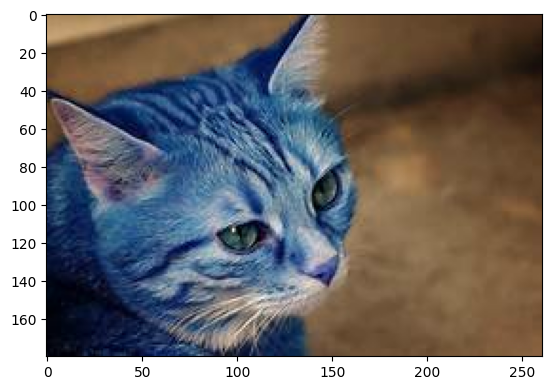

In [20]:
plt.imshow(test_img1)

In [21]:
image = cv2.imread('/content/dog1.jpeg')

In [22]:
image = cv2.resize(image, (256,256))

In [23]:
image = image.reshape((1,256,256,3))

In [24]:
prediction = model.predict(image)[0][0]
prediction

1/1 [==============================] - 0s 476ms/step


1.0

In [31]:
def Cat_or_Dog(image):
  image = cv2.resize(image,(256,256))
  temp_image = image
  image = image.reshape((1,256,256,3))
  prediction = model.predict(image)[0][0]
  plt.imshow(temp_image)

  if prediction == 1:
    print("The Image in the picture is DOG🐶🐕‍🦺")
  else:
    print("The Image in the picture is CAT🐈🙀")


1/1 [==============================] - 0s 18ms/step
The Image in the picture is CAT🐈🙀


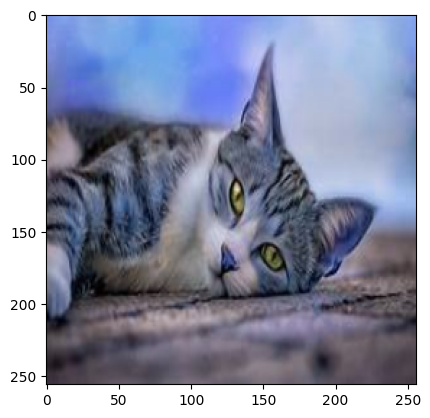

In [33]:
image = cv2.imread('/content/cat2.jpeg')
Cat_or_Dog(image)

1/1 [==============================] - 0s 17ms/step
The Image in the picture is CAT🐈🙀


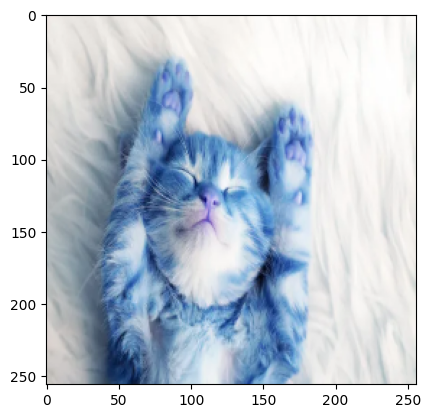

In [34]:
image = cv2.imread('/content/cat3.jpeg')
Cat_or_Dog(image)

1/1 [==============================] - 0s 18ms/step
The Image in the picture is DOG🐶🐕‍🦺


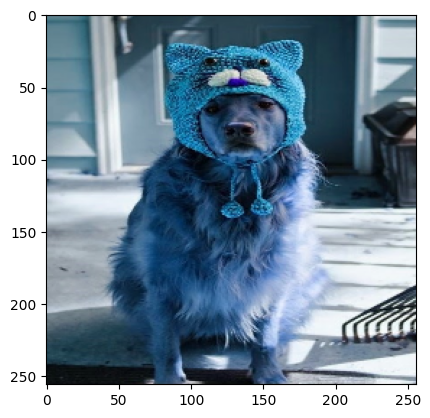

In [35]:
image = cv2.imread('/content/dog3.jpg')
Cat_or_Dog(image)

1/1 [==============================] - 0s 18ms/step
The Image in the picture is CAT🐈🙀


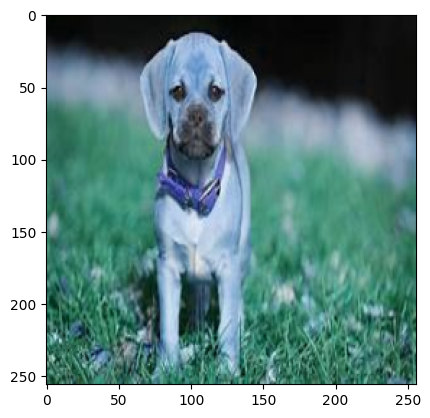

In [36]:
image = cv2.imread('/content/dog2.jpeg')
Cat_or_Dog(image)

In [37]:
import pickle
pickle.dump(model,open('model.pkl','wb'))